In [1]:
from keras.datasets import boston_housing
import numpy as np
from keras import models
from keras import layers
import matplotlib.pyplot as plt

2022-04-06 19:26:01.171174: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-06 19:26:01.171192: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
(train_data,train_targets),(test_data,test_targets)=boston_housing.load_data()

In [3]:
train_data.shape

(404, 13)

In [4]:
mean=train_data.mean(axis=0)
train_data-=mean
std=train_data.std(axis=0)
train_data/=std

test_data-=mean
test_data/=std

In [5]:
def build_model():
    model=models.Sequential()
    model.add(layers.Dense(64,activation='relu',input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64,activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
    return model

In [6]:
k=4
num_val_samples=len(train_data)//k
num_epoches=100
all_scores=[]

In [ ]:
for i in range(k):
    print('processing fold #',i)
    val_data=train_data[i*num_val_samples: (i+1)*num_val_samples]
    val_targets=train_targets[i*num_val_samples: (i+1)*num_val_samples]
    
    partial_train_data=np.concatenate(
        [train_data[:i*num_val_samples:],
         train_data[(i+1)*num_val_samples:]],
        axis=0)
    partial_train_targets=np.concatenate(
        [train_targets[:i*num_val_samples:],
         train_targets[(i+1)*num_val_samples:]],
        axis=0)
    model=build_model()
    model.fit(partial_train_data,partial_train_targets,
             epochs=num_epoches,batch_size=1,verbose=0)
    val_mse,val_mae=model.evaluate(val_data,val_targets,verbose=0)
    all_scores.append(val_mae)

In [ ]:
print(all_scores)
print(np.mean(all_scores))

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


Text(0.5, 0, 'Epochs')

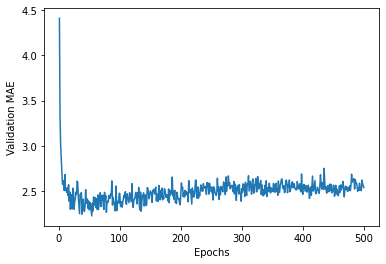

In [10]:
num_epoches=500
all_mae_histories=[]
%timeit 
for i in range(k):
    print('processing fold #',i)
    val_data=train_data[i*num_val_samples: (i+1)*num_val_samples]
    val_targets=train_targets[i*num_val_samples: (i+1)*num_val_samples]

    partial_train_data=np.concatenate(
        [train_data[:i*num_val_samples:],
         train_data[(i+1)*num_val_samples:]],
        axis=0)
    partial_train_targets=np.concatenate(
        [train_targets[:i*num_val_samples:],
         train_targets[(i+1)*num_val_samples:]],
        axis=0)
    model=build_model()
    history=model.fit(partial_train_data,partial_train_targets,
              validation_data=(val_data,val_targets),
             epochs=num_epoches,batch_size=1,verbose=0)
    #history_dict=history.history
    #print(history_dict.keys())
    mae_history=history.history['val_mae']
    all_mae_histories.append(mae_history)

average_mae_history=[np.mean([x[i] for x in all_mae_histories]) for i in range(num_epoches)]

plt.plot(range(1,len(average_mae_history)+1),average_mae_history)
plt.ylabel('Validation MAE')
plt.xlabel('Epochs')


In [ ]:
def smooth_curve(points,factor=.9):
    smoothed_points=[]
    for point in points:
        if smoothed_points:
            previous=smoothed_points[-1]
            smoothed_points.append(previous*factor+point*(1-factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history=smooth_curve(average_mae_history[10:])
plt.plot(range(1,len(smooth_mae_history)+1),smooth_mae_history)
plt.ylabel('Validation MAE')
plt.xlabel('Epochs')


In [9]:
%timeit model= build_model()
model.fit(train_data,train_targets,epochs=80,batch_size=16,verbose=0)
test_mse_score, test_mae_score=model.evaluate(test_data,test_targets)
test_mae_score

11.8 ms ± 52.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
4/4 [==============================] - 0s 1ms/step - loss: 13.2391 - mae: 2.4968


2.4968490600585938